# Facebook Ad Evaluation and Optimization (FAEO) Project

**IMPORTING LIBRARIES AND DATASET**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/PREPINSTA /MACHINE LEARNING /7.RAINFORCEMENT LEARNING /DATASET /Upper Confidence Bound Facebook.csv")
dataset

,Advertisement 1,Advertisement 2,Advertisement 3,Advertisement 4,Advertisement 5,Advertisement 6,Advertisement 7,Advertisement 8,Advertisement 9,Advertisement 10
0,0,0,0,1,0,1,0,0,0,0
1,0,1,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
14995,1,1,0,0,0,0,0,0,0,0
14996,0,1,0,1,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,0,0,0
14998,0,0,0,0,0,0,0,0,1,0


In [4]:
# HERE WE WILL NOT SPLIT THE DATASET WE WILL JUST CLASSIFY THEM
# WE JUST NEED TO KNOW WHICH ONE IS BEST


# WE WILL NEED THE WHOLE DATASET HERE

**IMPLEMENTATION**

In [5]:
import math
T = 15000    # total no of adds = rows
num_ads = 10   # total no of adds in que are 10 = columns
ads_selected = []  # we will chose any add for that we will create the empty list

number_of_selections = [0] * num_ads
# for anty particular round we want to say that sum each add is selected how many times
# we will create the 1 d array of such values
# suppose we have goen for rounfd 980 then for each add we will tell him how much adds are been selected
# 0 = not selected and 1 = selected add

sum_of_rewards = [0] * num_ads

total_rewards = 0


# we want to itrate throw all the rounds = 15000 rows  using for loop
for n in range(0,T):

  # we will create the variable for showing we are present on this particuar add
  ad = 0

  # we need to calculate the upper confidence bound at each add at each round
  max_upper_bound = 0

# now we need to itrate throw all columns
  for i in range(0,num_ads):

  #here we will cheak the add in the que is choosen or not
  # if not selectedd then value is 0  , if selected we want the rule for that
  # if any add 1....10 selected then we will have the previous no go throw next rounfd
    if (number_of_selections[i] >0):

    # step 2
    # calculating the average
      average_reward = sum_of_rewards[i] / number_of_selections[i]

    # calculating the confidence interval
      delta_i = math.sqrt(3/2 * (math.log(n+1) / number_of_selections[i] ))

    # step 3
    # we select add i with maximum value of under confidence bound
      upper_bound = average_reward + delta_i

    # we have upper side coded considringn the add has been choosen 1 time atleas

    # now we will code for the add chossedn for the 1 st time
    else :
      # we need to set our upper bound very very large value that upper bound cant reach
      # it like connsant for us
       upper_bound = 1e400 # this value cant be reach

    # we will chek our upper_confidence_baound value is greater than the max_upper_confidence_bound
    # we will set max_upper_confidence_bound as upper_confidence_baound
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      # we can consider this as very large value infinity
      ad = i

  # now we will add ads into the add_selected = [] which we have created on the above side
  ads_selected.append(ad)

  # we will increment the value of numbers of add selected
  number_of_selections[ad] = number_of_selections[ad] +1

  # we will calculate thwe sum of rewards calculated for the particular add
  # we can directly calculate this from the dataset itself

  reward = dataset.values[n , ad]
  sum_of_rewards[ad] = sum_of_rewards[ad] + reward

  # now we will calculate the total rewards here
  total_rewards = total_rewards + reward


**HISTOGRAM VISUALIZATION**

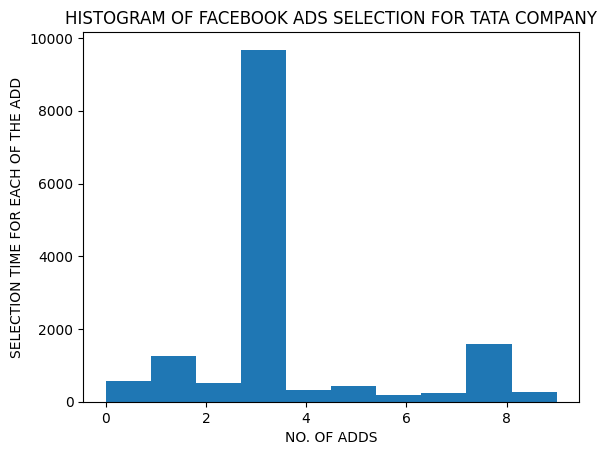

In [6]:
plt.hist(ads_selected)
plt.title("HISTOGRAM OF FACEBOOK ADS SELECTION FOR TATA COMPANY")
plt.xlabel("NO. OF ADDS")
plt.ylabel("SELECTION TIME FOR EACH OF THE ADD")
plt.show()